In [1]:
import sys
import os
import importlib
# from IPython.display import Image, display
import IPython
import io
from PIL import Image as PILImage

sys.path.append(os.path.join(
    os.getcwd(),
    "notebooks",
    "laz_to_dtm")
)
import utils

In [6]:
importlib.reload(utils);

In [2]:
utils.login(verbose=False)

True

In [3]:
doi = "10.3334/ORNLDAAC/1644"
dataset = utils.TileMetadata(
    doi,
    path_to_tiles = os.path.join(
        os.getcwd(),
        "data"
    )
)
df = dataset.df_tile_metadata
df.head(1)

Found 1 datasets for DOI: 10.3334/ORNLDAAC/1644


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

Tile metadata CSV loaded from: /Users/jamesbyers/code/github/Kaggle/openai_to_z/data/cms_brazil_lidar_tile_inventory.csv


,filename,max_lat,min_lat,max_lon,min_lon,file_type,file_size_mb,file_format,version,created,utmzone,srs
0,ANA_A01_2017_laz_0.laz,-3.363488,-3.372548,-54.992912,-55.001927,pointcloud,85.374953,LAS/LAZ,1.2,214/2017,21S,+proj=utm +zone=21 +south +ellps=GRS80 +towgs8...


In [9]:
tile_index = 0

Tile index: 3060
Tile name: TAP_A03_2012_laz_10.laz
Tile dimensions (w x h): 1009 x 926 m
Tile area: 0.93 km**2
Tile centre coordinates: -3.1148, -54.9533


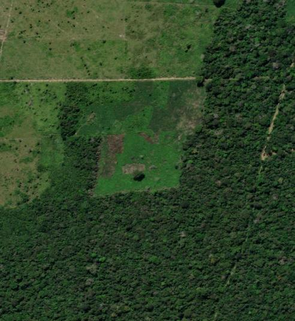

In [184]:
#S pecify tile index to interrogate
tile_index = 3060
row = df.iloc[tile_index]

# Creat Tile object
tile = utils.Tile(row, index=tile_index)
tile.print_metadata()
# print(f"Area: {tile.area:.2f} km**2\nIndex: {tile.index}")

# View satellite image in interactive mode
# tile.fetch_satellite_image_interactive()

# Define path to satellite images of tile
path_to_tiles_sat = os.path.join(
    os.getcwd(),
    "data",
    "tiles",
    "sat"
)

# Create static satellite image for viewing alongside LiDAR processed data later
# Either:
# (a) annotate = True ; buffer_m > 0
# (b) annotate = False; buffer_m >= 0
tile.fetch_satellite_image_static(
    save_path = path_to_tiles_sat,
    annotate = False,
    force_download = False,
    buffer_m = 0
)
tile.display_sat_image(scale=0.6)
